# `fast.ai` starter image classifier
Fast.ai [tutorial](https://docs.fast.ai/tutorial.vision.html).

In [2]:
from fastai.vision.all import *

# add parent dir to path
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

from params import PATH_OUT

In [3]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
path = PATH_OUT / "data_classifier_png"
assert path.exists()

In [5]:
path.ls()

(#749) [Path('../out/data_classifier_png/1bba45a5afd5264be903_OK.png'),Path('../out/data_classifier_png/4ccf342bf537878a02e2_FAILED.png'),Path('../out/data_classifier_png/eee102d9f948aea42dc7_FAILED.png'),Path('../out/data_classifier_png/24771036ad7458f0f36a_OK.png'),Path('../out/data_classifier_png/d2adc6a8c7a5a6b52b8e_OK.png'),Path('../out/data_classifier_png/8438de50c14a7aff30a4_FAILED.png'),Path('../out/data_classifier_png/0f9f33eb0718c3d3eba0_OK.png'),Path('../out/data_classifier_png/19f473cf4d3db6f19f36_OK.png'),Path('../out/data_classifier_png/bd179bd3aa5b8c47afdc_OK.png'),Path('../out/data_classifier_png/1971dd2c6541c1c67f3f_OK.png')...]

In [6]:
files = get_image_files(path)
len(files)

749

In [8]:
def label_func(x):
    x = Path(x)
    return x.name.split("_")[-1].split(".")[0]

In [9]:
label_func(files[0])

'OK'

In [10]:
# load image example to memory
img = PILImage.create(files[0])
img

In [11]:
dls = ImageDataLoaders.from_name_func(
    path, files, label_func, valid_pct=0.2, seed=42,
    item_tfms=Resize((16, 24)), batch_tfms=None
)

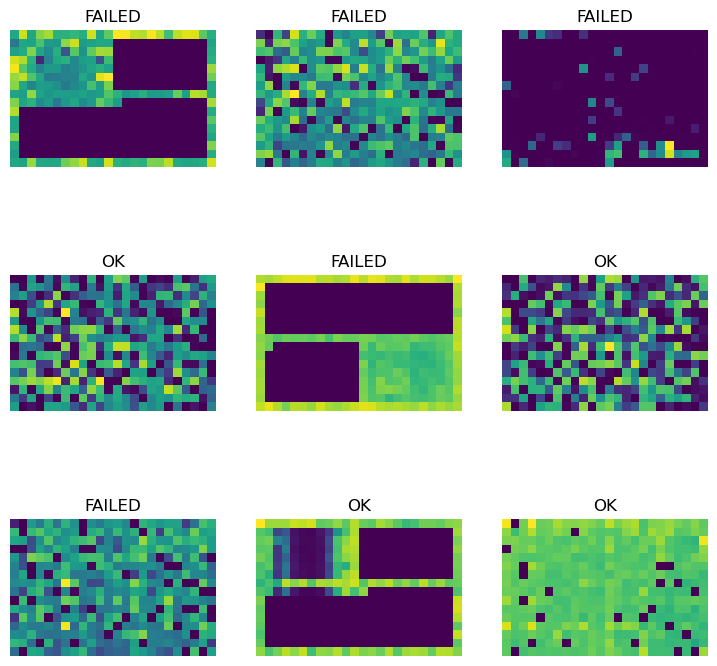

In [12]:
dls.show_batch()

In [13]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/anton/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 69.8MB/s]


SuggestedLRs(valley=0.002511886414140463)

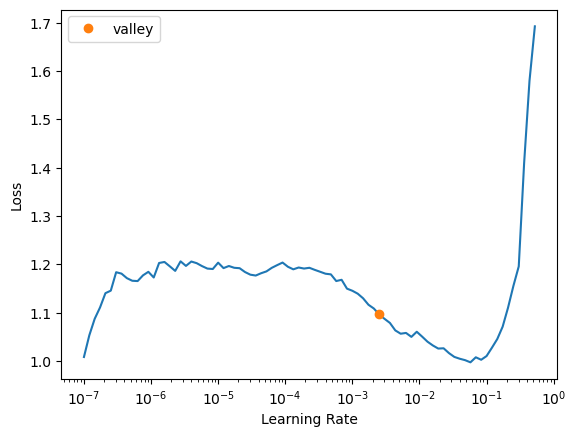

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(3, 2.5e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.108781,0.682472,0.328859,00:01
1,0.959177,0.564714,0.221477,00:01
2,0.858216,0.639270,0.234899,00:01


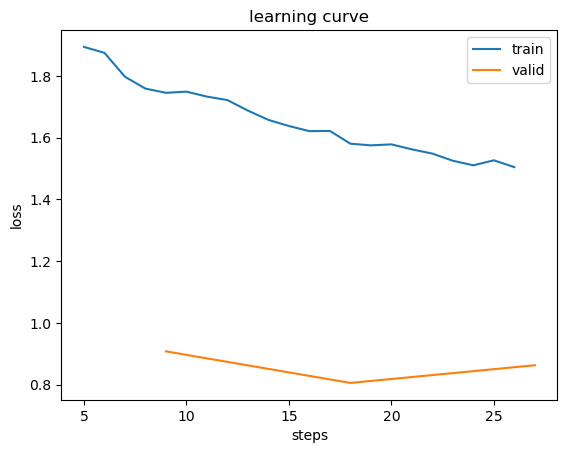

In [15]:
# plot losses
learn.recorder.plot_loss();

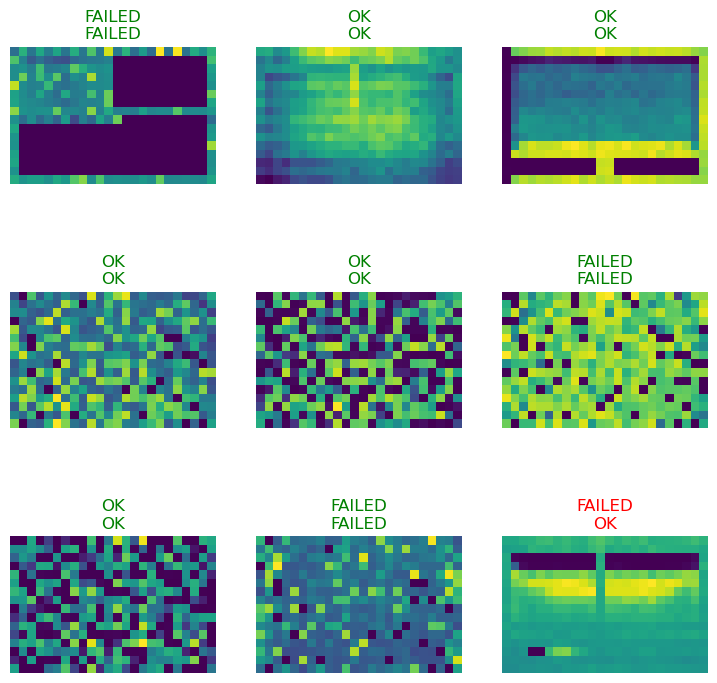

In [16]:
learn.show_results()

In [17]:
interp = Interpretation.from_learner(learn)

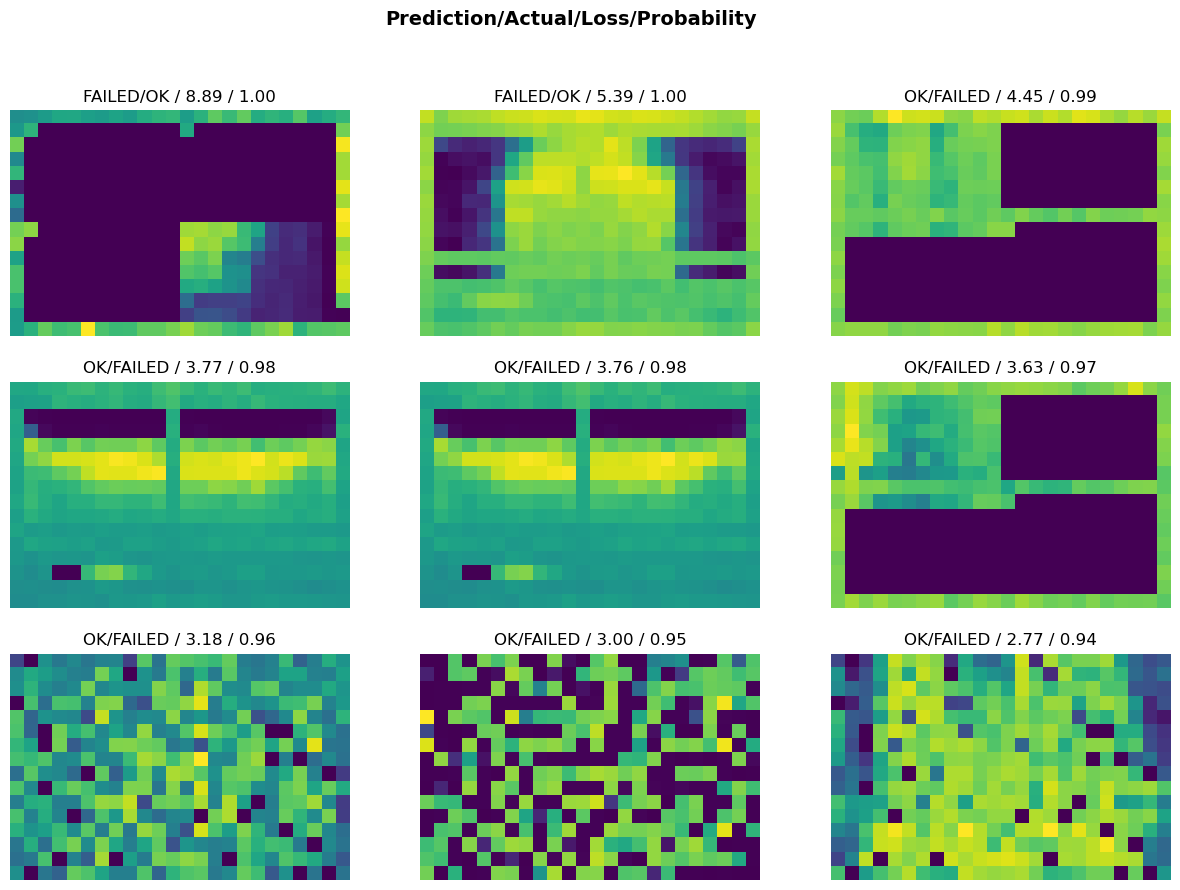

In [18]:
interp.plot_top_losses(9, figsize=(15,10))

In [19]:
classification_interpretation = ClassificationInterpretation.from_learner(learn)

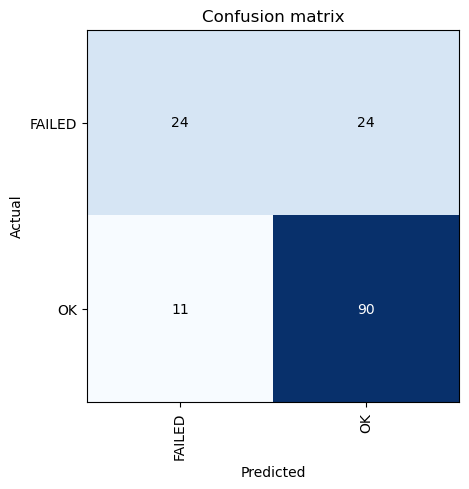

In [20]:
classification_interpretation.plot_confusion_matrix()

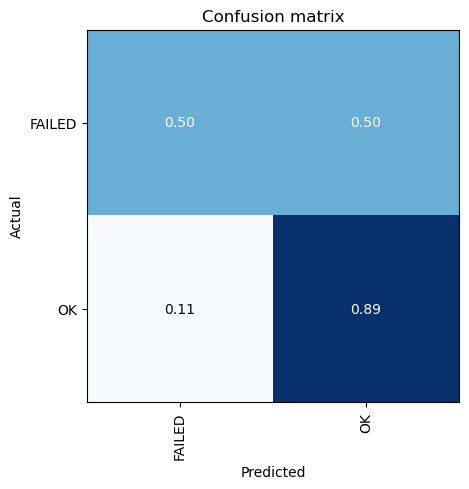

In [21]:
classification_interpretation.plot_confusion_matrix(normalize=True)